<a href="https://colab.research.google.com/github/muhammadhafiz27/Deep-Learning/blob/main/Recurrent_Neural_Network_(RNN)_untuk_Pemrosesan_Data_Sekuensial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# **Membuat data urutan sinusoidal**

In [2]:
data = np.sin(np.linspace(0, 100, 1000))
seq_length = 10

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X, y = create_sequences(data, seq_length)
X = torch.FloatTensor(X).unsqueeze(-1)
y = torch.FloatTensor(y).unsqueeze(-1)

# **Definisi model RNN**

In [3]:
class RNNModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, output_size=1):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # ambil output terakhir
        return out

# **Inisialisasi model, loss, dan optimizer**

In [4]:
model = RNNModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# **Training loop**

In [5]:
epochs = 50
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/50], Loss: 0.1681
Epoch [20/50], Loss: 0.0330
Epoch [30/50], Loss: 0.0080
Epoch [40/50], Loss: 0.0023
Epoch [50/50], Loss: 0.0011


# **Plot loss**

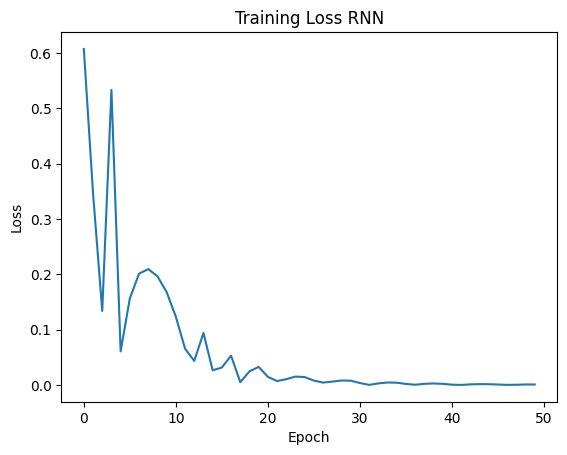

In [6]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss RNN')
plt.show()

# **Prediksi**

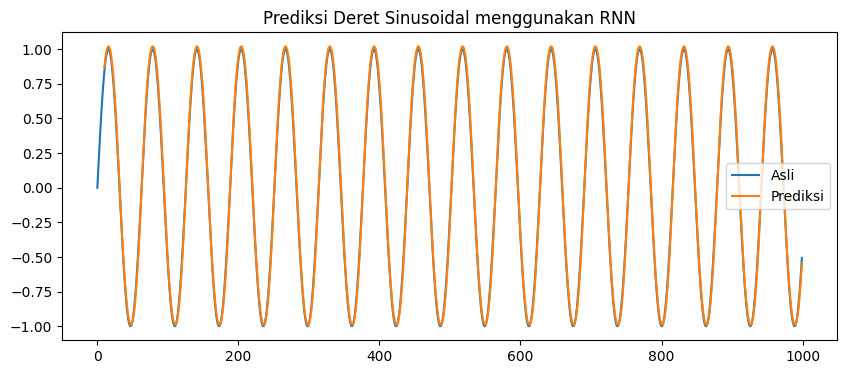

In [7]:
with torch.no_grad():
    preds = model(X).numpy()

plt.figure(figsize=(10,4))
plt.plot(data, label='Asli')
plt.plot(np.arange(seq_length, len(preds)+seq_length), preds, label='Prediksi')
plt.legend()
plt.title('Prediksi Deret Sinusoidal menggunakan RNN')
plt.show()